In [1]:
%matplotlib inline
from ipywidgets import interactive, fixed

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pd.options.display.float_format = '{:.2f}'.format

In [4]:
def plot_mulitple(*series, figsize=(12, 7), legend=[]):
    fig = plt.figure(figsize=figsize)
    for element in series:
        plt.plot(element)
    plt.legend(legend)
    plt.show()

# Chebyshew
$$
    P(|X - \mu| \geq n\sigma) \leq \frac{1}{n^2}
$$
$$ \mu = EX $$
$$ \sigma^2 = VarX $$
$$
    P(|X -\mu| \geq n \sqrt{\sigma}) \leq \frac{1}{n^2} \
$$
$$
    |X - \mu| = n \sqrt{\sigma}
$$
$$
    X = \mu + n \sqrt{\sigma} \lor X = \mu - n \sqrt{\sigma}
$$

In [1]:
def chebyshev(ex, varx, prob):
    n = np.sqrt(1/prob)
    low = ex - n * np.sqrt(varx)
    high = ex + n * np.sqrt(varx)
    return low, high

In [37]:
def stats(row):
    minAn = min(row)
    maxAn = max(row)
    meanAn = np.mean(row) # Expected value
    varAn = np.var(row)
    chebLow, chebHigh = chebyshev(meanAn, varAn, 0.2)
    return minAn, maxAn, meanAn, varAn, chebLow, chebHigh

In [38]:
def analyze_csv(fname):
    df = pd.read_csv(fname, header=None)
    ns = df.iloc[:,0].tolist()
    df = df.drop(df.columns[0], 1)
    
    data = []
    for index, row in df.iterrows():
        row = row.tolist()
        row = stats(row)
        t = (1.75*(index + 1) * 100 * np.log2((index + 1) * 100),)
        data.append(row + t)

    return pd.DataFrame(data, index=ns, columns=["min(X)", "max(X)", "E[X]", "Var[X]", "chebLow", "chebHigh", "theoretical"])

In [39]:
def plot_data_frame(df):
    df = df.drop(labels='Var[X]', axis=1)
    x = df.index
    y = df.T.values
    for column, label in zip(y, df.columns):
        plt.plot(x, column, label=label)
    plt.rcParams["figure.figsize"] = (10,10)
    plt.legend()
    plt.show()

In [40]:
qs = analyze_csv("qs_experiment.csv"); qs

,min(X),max(X),E[X],Var[X],chebLow,chebHigh,theoretical
100,1116,1531,1238.77,3550.13,1105.54,1372.00,1162.67
200,2542,3323,2796.78,14486.96,2527.64,3065.91,2675.35
300,4083,5273,4484.13,33618.72,4074.14,4894.12,4320.13
400,5761,7264,6251.69,61548.15,5696.95,6806.43,6050.70
500,7430,9509,8082.08,92725.78,7401.17,8762.98,7845.06
...,...,...,...,...,...,...,...
9600,209007,248696,221491.64,36633387.31,207957.72,235025.56,222244.15
9700,210188,248974,223688.12,35881662.17,210293.78,237082.45,224812.98
9800,212675,250610,226422.51,37173988.97,212789.10,240055.93,227384.41
9900,216035,255963,228842.39,38488562.15,214970.02,242714.77,229958.41


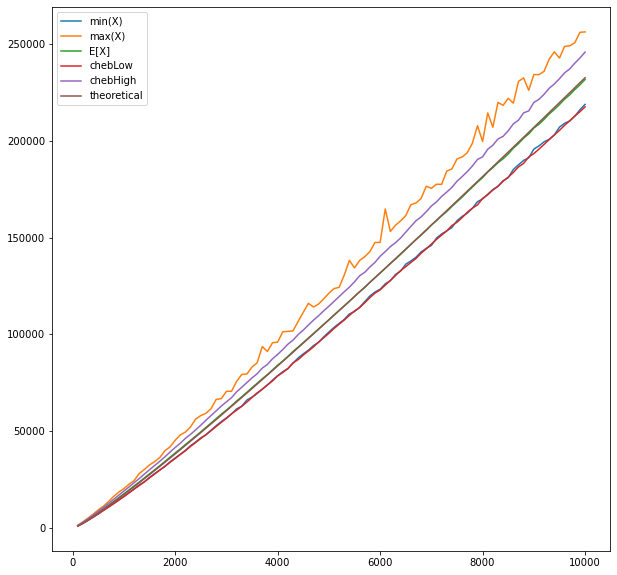

In [41]:
plot_data_frame(qs)

In [42]:
ms = analyze_csv("ms_experiment.csv"); ms

,min(X),max(X),E[X],Var[X],chebLow,chebHigh,theoretical
100,520,558,541.55,39.11,527.57,555.54,1162.67
200,1247,1305,1281.55,71.71,1262.61,1300.48,2675.35
300,2057,2130,2097.48,100.91,2075.02,2119.95,4320.13
400,2928,3000,2962.33,133.69,2936.47,2988.18,6050.70
500,3807,3888,3854.66,159.42,3826.43,3882.90,7845.06
...,...,...,...,...,...,...,...
9600,114825,115224,115054.90,3689.02,114919.09,115190.71,222244.15
9700,116222,116625,116398.76,3336.89,116269.60,116527.93,224812.98
9800,117564,117929,117753.17,3370.83,117623.34,117882.99,227384.41
9900,118893,119325,119098.70,3777.86,118961.26,119236.14,229958.41


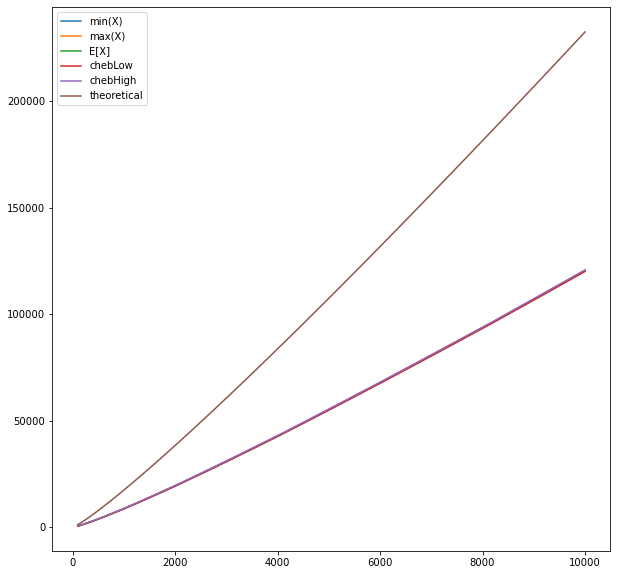

In [36]:
plot_data_frame(ms)